<a href="https://colab.research.google.com/github/olivierlubet/IBM_advanced_datascience_Coursera_Capstone/blob/master/GDN_Analysis_step_3_feature_eng_python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grand Débat National - Feature Engineering

In [52]:
!ls -alh

total 1.2G
drwxr-xr-x 1 root root 4.0K Apr  6 17:11 .
drwxr-xr-x 1 root root 4.0K Apr  6 16:38 ..
-rw-r--r-- 1 root root 2.5K Apr  6 17:11 adc.json
drwxr-xr-x 1 root root 4.0K Apr  6 17:11 .config
-rw-r--r-- 1 root root  14K Apr  6 16:46 extract_features.py
-rw-r--r-- 1 root root 751K Apr  6 17:10 GDN.384.npy
-rw-r--r-- 1 root root 227M Apr  6 16:40 GDN.csv
-rw-r--r-- 1 root root 163M Apr  6 16:56 GDN.jsonl
-rw-r--r-- 1 root root 147M Apr  6 16:56 GDN.npy
-rw-r--r-- 1 root root  89K Apr  6 16:46 GDN.txt
-rw-r--r-- 1 root root  38K Apr  6 16:46 modeling.py
drwxr-xr-x 2 root root 4.0K Apr  6 16:46 multi_cased_L-12_H-768_A-12
-rw-r--r-- 1 root root 633M Nov 24 00:57 multi_cased_L-12_H-768_A-12.zip
drwxr-xr-x 2 root root 4.0K Apr  6 16:46 __pycache__
drwxr-xr-x 1 root root 4.0K Apr  4 20:20 sample_data
-rw-r--r-- 1 root root  12K Apr  6 16:46 tokenization.py


# Installation and imports of modules

In [0]:

import os
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import *

# Create an input file for BERT
https://github.com/google-research/bert

In [54]:
df = pd.read_csv('GDN.csv',header=0).dropna()
df.head(5)

,Unnamed: 0,questionTitle,formattedValue
0,14,Que pourrait faire la France pour faire partag...,Enseignement du tri sélectif à l'école
1,15,Y a-t-il d'autres points sur la transition éco...,Multiplier les centrales géothermiques
2,16,Quel est aujourd'hui pour vous le problème con...,Les problèmes auxquels se trouve confronté l’e...
3,17,Que faudrait-il faire selon vous pour apporter...,Les problèmes auxquels se trouve confronté l’e...
4,30,Que pourrait faire la France pour faire partag...,Mettre en oeuvre au niveau national ses engage...


In [0]:
SAMPLES_NB=2000
df.formattedValue.sample(SAMPLES_NB).to_csv('GDN.txt',index=False)

In [56]:
!wc -l GDN.*

     2382 GDN.384.npy
   763309 GDN.csv
      500 GDN.jsonl
   255697 GDN.npy
     2000 GDN.txt
  1023888 total


## Installing BERT

In [0]:
BERT_MODEL = 'multi_cased_L-12_H-768_A-12'

In [0]:
if not os.path.isfile(f"{BERT_MODEL}.zip") : 
  print('Downloading BERT')
  os.system(f"wget https://storage.googleapis.com/bert_models/2018_11_23/{BERT_MODEL}.zip")

In [59]:
if not os.path.isdir(BERT_MODEL) :
  with zipfile.ZipFile(BERT_MODEL+".zip","r") as zip_ref:
      zip_ref.extractall()

for r, d, f in os.walk(BERT_MODEL):
  print(f)

['bert_model.ckpt.meta', 'bert_config.json', 'vocab.txt', 'bert_model.ckpt.data-00000-of-00001', 'bert_model.ckpt.index']


In [60]:
!wget https://raw.githubusercontent.com/google-research/bert/master/modeling.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/extract_features.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/tokenization.py

--2019-04-06 18:31:06--  https://raw.githubusercontent.com/google-research/bert/master/modeling.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37922 (37K) [text/plain]
Saving to: ‘modeling.py.1’

modeling.py.1       100%[===================>]  37.03K  --.-KB/s    in 0.01s   

2019-04-06 18:31:06 (3.04 MB/s) - ‘modeling.py.1’ saved [37922/37922]

--2019-04-06 18:31:07--  https://raw.githubusercontent.com/google-research/bert/master/extract_features.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13898 (14K) [text/plain]
Saving to: ‘ex

## Using BERT to extract fixed feature vectors 

In [0]:
import modeling
import extract_features
import tokenization
import tensorflow as tf

In [62]:
os.system(f"python3 extract_features.py \
	  --input_file=GDN.txt \
	  --output_file=GDN.jsonl \
	  --vocab_file={BERT_MODEL}/vocab.txt \
	  --bert_config_file={BERT_MODEL}/bert_config.json \
	  --init_checkpoint={BERT_MODEL}/bert_model.ckpt \
	  --layers=-1 \
	  --max_seq_length=256 \
	  --batch_size=8")

0

In [63]:
! wc -l GDN.*

      2382 GDN.384.npy
    763309 GDN.csv
      2000 GDN.jsonl
    255697 GDN.npy
      2000 GDN.txt
   1025388 total


In [64]:
! ls -alh GDN.*

-rw-r--r-- 1 root root 751K Apr  6 17:10 GDN.384.npy
-rw-r--r-- 1 root root 227M Apr  6 16:40 GDN.csv
-rw-r--r-- 1 root root 620M Apr  6 19:07 GDN.jsonl
-rw-r--r-- 1 root root 147M Apr  6 16:56 GDN.npy
-rw-r--r-- 1 root root 326K Apr  6 18:31 GDN.txt


# BERT output ... what do we get ?

In [0]:
bert_output = pd.read_json("GDN.jsonl", lines = True)

In [66]:
bert_output.head(5)

,features,linex_index
0,"[{'token': '[CLS]', 'layers': [{'index': -1, '...",0
1,"[{'token': '[CLS]', 'layers': [{'index': -1, '...",1
2,"[{'token': '[CLS]', 'layers': [{'index': -1, '...",2
3,"[{'token': '[CLS]', 'layers': [{'index': -1, '...",3
4,"[{'token': '[CLS]', 'layers': [{'index': -1, '...",4


In [67]:
bert_output.features.count()

2000

In [0]:
bert_output['token_count']=bert_output.features.map(lambda x:len(x))

In [69]:
bert_output.token_count.describe()

count    2000.000000
mean       40.436500
std        45.373366
min         3.000000
25%        14.000000
50%        24.000000
75%        48.000000
max       256.000000
Name: token_count, dtype: float64

75% of answers counts < 50 tokens

## Level 1: token list

In [70]:
for i in range(3):print("{}:{}".format(i,len(bert_output.features.iloc[i])))

0:24
1:6
2:44


In [71]:
bert_output.features.iloc[0][0].keys()

dict_keys(['token', 'layers'])

In [72]:
for i in range(5) :print(bert_output.features.iloc[0][i]['token'])

[CLS]
e
##cono
##mise
##r


## Level 2: layers extracted (only the last: -1)

In [73]:
for i in range(3):print("{}:{}".format(i,len(bert_output.features.iloc[0][i]['layers'])))

0:1
1:1
2:1


In [74]:
bert_output.features.iloc[0][0]['layers'][0].keys()

dict_keys(['index', 'values'])

In [75]:
print(bert_output.features.iloc[0][1]['layers'][0]['index'])

-1


## Level 3: vectors (768-hidden)

In [76]:
len(bert_output.features.iloc[0][1]['layers'][0]['values'])

768

In [77]:
for i in range(3) : print("{}:{}".format(i,bert_output.features.iloc[0][0]['layers'][0]['values'][i]))

0:-0.21756799999999998
1:-0.552719
2:0.237342


# Flatten each answer
Taking the fact that 75% of anwsers are < 30 words and < 50 tokens

In [78]:
sample_size = bert_output.features.count()
tokens_size = 50
hidden_embedded = 768

data = np.zeros((sample_size,tokens_size,hidden_embedded))
data.shape

(2000, 50, 768)

In [0]:
for sample_index, row in bert_output.iterrows():
  for token_index,token in enumerate(row.features):
    if token_index < tokens_size :
      data[sample_index,token_index]=token['layers'][0]['values']

# Save the numpy array

In [0]:
np.save(arr=data,file='GDN.npy')

In [81]:
data.shape

(2000, 50, 768)

# How to give our sentences a reasonable size
## Way 1 - Get the document vocabulary to build TF-IDF

In [0]:
vocab = []
for sample_index, row in bert_output.iterrows():
  for token_index,token in enumerate(row.features):
      vocab.append(token['layers'][0]['values'])

In [0]:
vocab = np.array(vocab)

In [84]:
vocab.shape

(80873, 768)

In [85]:
np.unique(vocab,axis=0).shape

(77437, 768)

BERT build for each token a sensitive meaning (the same token in two different places has not the same meaning), and our vocabulary can't be directly reduce by "unique meanings"

In [86]:
np.unique(np.around(vocab,2),axis=0).shape

(77437, 768)

In [87]:
np.unique(np.around(vocab,0)).shape

(12,)

##Way 2 - Building a unique vector for each sentence
This unique verctor should represents the sequentiality of sentences as well as the vocabulary used
The operation may be done with an autoencoder

In [88]:

timesteps = data.shape[1]
input_dim = data.shape[2]
latent_dim = int(timesteps * input_dim / 100) # factor of compression
# 20 does not reveal clusters

print(timesteps,input_dim,latent_dim)

50 768 384


In [0]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model


inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

In [0]:

sequence_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [91]:
from keras.callbacks import TensorBoard

history = sequence_autoencoder.fit(data, data,
                epochs=20,#with more resources, 50 step should be good
                batch_size=10,
                shuffle=True,
                #validation_data=(data, data),
                validation_split=0.10)

Train on 1800 samples, validate on 200 samples
Epoch 1/20
1800/1800 [==============================] - 320s 178ms/step - loss: -0.7022 - val_loss: -0.8099
Epoch 2/20
1800/1800 [==============================] - 311s 173ms/step - loss: -0.8330 - val_loss: -0.8784
Epoch 3/20
1800/1800 [==============================] - 312s 173ms/step - loss: -0.8126 - val_loss: -0.8837
Epoch 4/20
1800/1800 [==============================] - 316s 175ms/step - loss: -0.8776 - val_loss: -0.9099
Epoch 5/20
1800/1800 [==============================] - 311s 173ms/step - loss: -0.8832 - val_loss: -0.8701
Epoch 6/20
1800/1800 [==============================] - 307s 171ms/step - loss: -0.8816 - val_loss: -0.9065
Epoch 7/20
1800/1800 [==============================] - 307s 171ms/step - loss: -0.8753 - val_loss: -0.9132
Epoch 8/20
1800/1800 [==============================] - 313s 174ms/step - loss: -0.9051 - val_loss: -0.9266
Epoch 9/20
1800/1800 [==============================] - 315s 175ms/step - loss: -0.8991 -

In [0]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

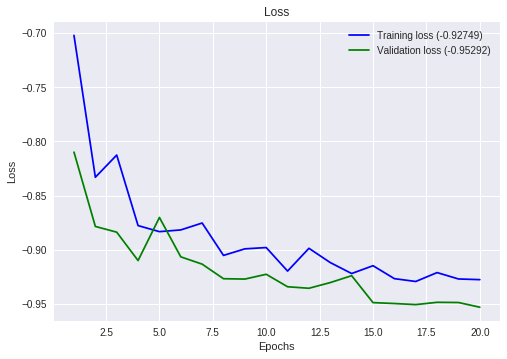

In [93]:
plot_history(history)

In [0]:
encoded_sentences = encoder.predict(data)

In [103]:
encoded_sentences

array([[-0.26245227, -0.25666213,  0.08752539, ..., -0.13205008,
         0.04058826, -0.46819636],
       [-0.40472546, -0.40587568,  0.42339396, ..., -0.15168694,
        -0.25214458,  0.2220865 ],
       [-0.6524361 , -0.11035485, -0.1997123 , ..., -0.33145887,
         0.05024191, -0.30099094],
       ...,
       [-1.        , -0.1658944 , -0.05029906, ..., -0.73552513,
         0.        , -0.        ],
       [-0.19412555, -0.20926133, -0.06095055, ..., -0.12067217,
         0.10307527, -0.45445633],
       [-0.34465495, -0.33085325,  0.27042502, ..., -0.17514987,
        -0.09972692, -0.40915352]], dtype=float32)

In [104]:
encoded_sentences.shape

(2000, 384)

# Normalize data

In [0]:
encoded_sentences=normalize(encoded_sentences,axis=0)

In [110]:
encoded_sentences

array([[-0.00989847, -0.02037162,  0.00775637, ..., -0.0091825 ,
         0.00710971, -0.0338003 ],
       [-0.01526434, -0.03221491,  0.03752055, ..., -0.010548  ,
        -0.04416731,  0.016033  ],
       [-0.02460682, -0.00875902, -0.01769821, ..., -0.02304898,
         0.0088007 , -0.02172931],
       ...,
       [-0.0377153 , -0.01316727, -0.00445743, ..., -0.05114694,
         0.        , -0.        ],
       [-0.0073215 , -0.01660936, -0.00540135, ..., -0.0083913 ,
         0.01805534, -0.03280837],
       [-0.01299877, -0.02626028,  0.02396467, ..., -0.01217957,
        -0.01746883, -0.02953785]], dtype=float32)

In [0]:
np.save(arr=encoded_sentences,file='GDN.384.npy')

In [111]:
! ls -alh GDN.*

-rw-r--r-- 1 root root 3.0M Apr  6 20:52 GDN.384.npy
-rw-r--r-- 1 root root 227M Apr  6 16:40 GDN.csv
-rw-r--r-- 1 root root 620M Apr  6 19:07 GDN.jsonl
-rw-r--r-- 1 root root 586M Apr  6 19:07 GDN.npy
-rw-r--r-- 1 root root 326K Apr  6 18:31 GDN.txt


# Backup files to

In [101]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

gdn = drive.CreateFile()
# Read file and set it as a content of this instance.
gdn.SetContentFile('GDN.384.npy')
gdn.Upload() # Upload the file.
print('title: %s, mimeType: %s' % (gdn['title'], gdn['mimeType']))


title: GDN.384.npy, mimeType: application/octet-stream
